<a href="https://colab.research.google.com/github/AzizahBsyrh/ProyekAkhir_FSD/blob/main/Tugas_Besar_FSD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mata Kuliah : FSD

Nama Anggota :


1.   Nur Azizah Basyirah Syamsuddin (24523238)
2.   Naila Reyhantyas Nurkhalisha (24523050)



##1. Latar Belakang

Identifikasi ras kucing secara manual sering kali bersifat subjektif dan membutuhkan pengalaman khusus. Perbedaan antar ras kucing tidak hanya terlihat dari penampilan fisik, tetapi juga dari perilaku dan karakteristik tertentu seperti tingkat aktivitas, berat badan, dan suara.

Dengan meningkatnya pemanfaatan teknologi kecerdasan buatan, khususnya machine learning, proses klasifikasi dapat dilakukan secara otomatis berdasarkan data historis. Model klasifikasi mampu mempelajari pola dari berbagai fitur kucing dan memberikan prediksi ras secara konsisten dan objektif.

Oleh karena itu, pada proyek akhir ini dibangun sebuah model klasifikasi ras kucing menggunakan dataset buatan sendiri yang berisi ciri fisik dan perilaku kucing.

## 2. Tujuan Penelitian

Tujuan dari proyek ini adalah:
- Membangun model klasifikasi ras kucing menggunakan Decision Tree.
- Melatih dan menguji model menggunakan dataset buatan sendiri.
- Mengevaluasi performa model dengan metrik klasifikasi.

## 3. Pengguna Model

Model ini dapat digunakan oleh:
- Klinik hewan
- Breeder kucing
- Peneliti hewan
- Aplikasi edukasi tentang ras kucing

**Import Library**

In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

## 4. Dataset

Dataset yang digunakan merupakan dataset buatan sendiri yang terdiri dari 5.000 data dengan 5 kelas ras kucing:
- Persia
- Anggora
- Kampung
- Maine Coon
- Siam

### Fitur Dataset:
- Berat (kg)
- Panjang bulu
- Tingkat aktivitas
- Warna dominan
- Suara kucing
- Umur (tahun)

Target klasifikasi adalah **RasKucing**.

In [153]:
df = pd.read_csv("dataset_kucing_5000_5ras.csv")
df.head()

,Berat,PanjangBulu,TingkatAktivitas,WarnaDominan,SuaraKucing,UmurTahun,RasKucing
0,2.8,Pendek,Sedang,Abu,Keras,2,Kampung
1,2.5,Pendek,Sedang,Abu,Keras,1,Kampung
2,3.6,Pendek,Tinggi,Putih,Keras,7,Siam
3,4.1,Panjang,Rendah,Abu,Pelan,8,Persia
4,4.6,Panjang,Rendah,Cream,Pelan,4,Persia


In [154]:
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Berat             5000 non-null   float64
 1   PanjangBulu       5000 non-null   object 
 2   TingkatAktivitas  5000 non-null   object 
 3   WarnaDominan      5000 non-null   object 
 4   SuaraKucing       5000 non-null   object 
 5   UmurTahun         5000 non-null   int64  
 6   RasKucing         5000 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 273.6+ KB


,0
Berat,0
PanjangBulu,0
TingkatAktivitas,0
WarnaDominan,0
SuaraKucing,0
UmurTahun,0
RasKucing,0


**(EDA: Distribusi Kelas)**

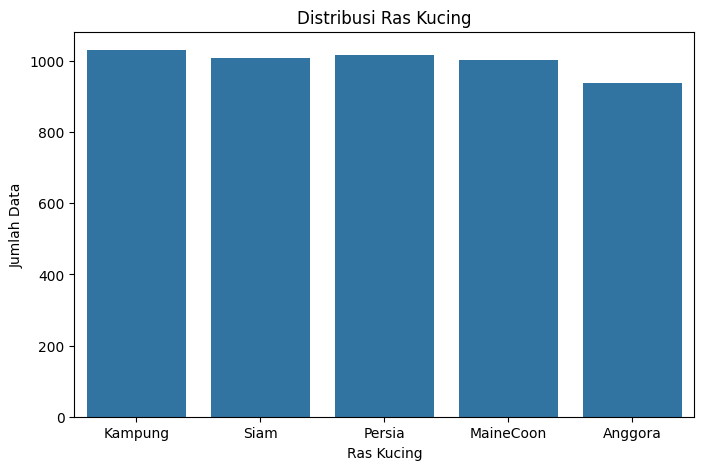

In [155]:
plt.figure(figsize=(8,5))
sns.countplot(x="RasKucing", data=df)
plt.title("Distribusi Ras Kucing")
plt.xlabel("Ras Kucing")
plt.ylabel("Jumlah Data")
plt.show()

## 5. Preprocessing Data

Tahapan preprocessing meliputi:
1. Pemisahan fitur dan target.
2. One-hot encoding untuk fitur kategorikal.
3. Label encoding untuk target.
4. Pembagian data menjadi data latih dan data uji.

**Split & Encoding**

In [156]:
X = df.drop(columns=["RasKucing"])
y = df["RasKucing"]

X = pd.get_dummies(X)

le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

## 6. Metode Pemodelan

Metode yang digunakan adalah **Decision Tree Classifier**.

Decision Tree dipilih karena:
- Mudah dipahami dan diinterpretasikan.
- Menghasilkan aturan keputusan yang jelas.
- Cocok untuk data klasifikasi multikelas.

**Training Model**

In [157]:
dt = DecisionTreeClassifier(
    criterion="gini",
    max_depth=6,
    random_state=42
)

dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, random_state=42)

**Evaluasi Model**

In [158]:
y_pred = dt.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.976

**Classification Report & Confusion Matrix**

In [159]:
print(classification_report(
    y_test,
    y_pred,
    target_names=le.classes_
))

              precision    recall  f1-score   support

     Anggora       1.00      1.00      1.00       188
     Kampung       1.00      0.88      0.94       206
   MaineCoon       1.00      1.00      1.00       201
      Persia       1.00      1.00      1.00       203
        Siam       0.89      1.00      0.94       202

    accuracy                           0.98      1000
   macro avg       0.98      0.98      0.98      1000
weighted avg       0.98      0.98      0.98      1000



**Confussion Matrix**

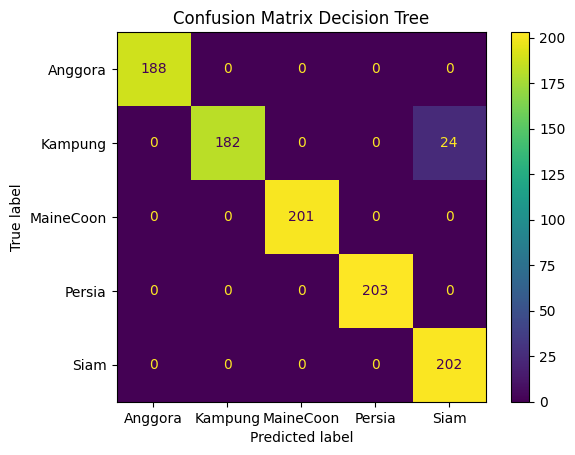

In [160]:
ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred,
    display_labels=le.classes_
)
plt.title("Confusion Matrix Decision Tree")
plt.show()

Kesimpulan dari matrix:

1. Akurasi Keseluruhan (Overall Accuracy): Model memiliki akurasi yang sangat tinggi yaitu 0.976 (97.6%). Ini menunjukkan bahwa model mampu mengklasifikasikan sebagian besar ras kucing dengan benar.

2. Performa Hampir Sempurna untuk Anggora, Maine Coon, dan Persia:

- Untuk ras Anggora, Maine Coon, dan Persia, model menunjukkan performa yang luar biasa dengan precision, recall, dan f1-score sebesar 1.00. Ini berarti semua kucing dari ras ini terklasifikasi dengan benar, dan tidak ada kucing dari ras lain yang salah diklasifikasikan sebagai ketiga ras ini.
3. Sedikit Kesalahan pada Ras Kampung:

- Ras Kampung memiliki recall 0.88, yang berarti sekitar 12% dari kucing ras Kampung yang sebenarnya tidak teridentifikasi dengan benar oleh model (salah diklasifikasikan sebagai ras lain). Namun, precision 1.00 menunjukkan bahwa setiap kali model memprediksi seekor kucing sebagai ras Kampung, prediksi tersebut selalu benar.
4. Sedikit Kesalahan pada Ras Siam:

- Ras Siam memiliki precision 0.89, yang berarti sekitar 11% dari prediksi model sebagai kucing Siam sebenarnya adalah kucing dari ras lain. Namun, recall 1.00 menunjukkan bahwa semua kucing ras Siam yang sebenarnya berhasil diidentifikasi oleh model.


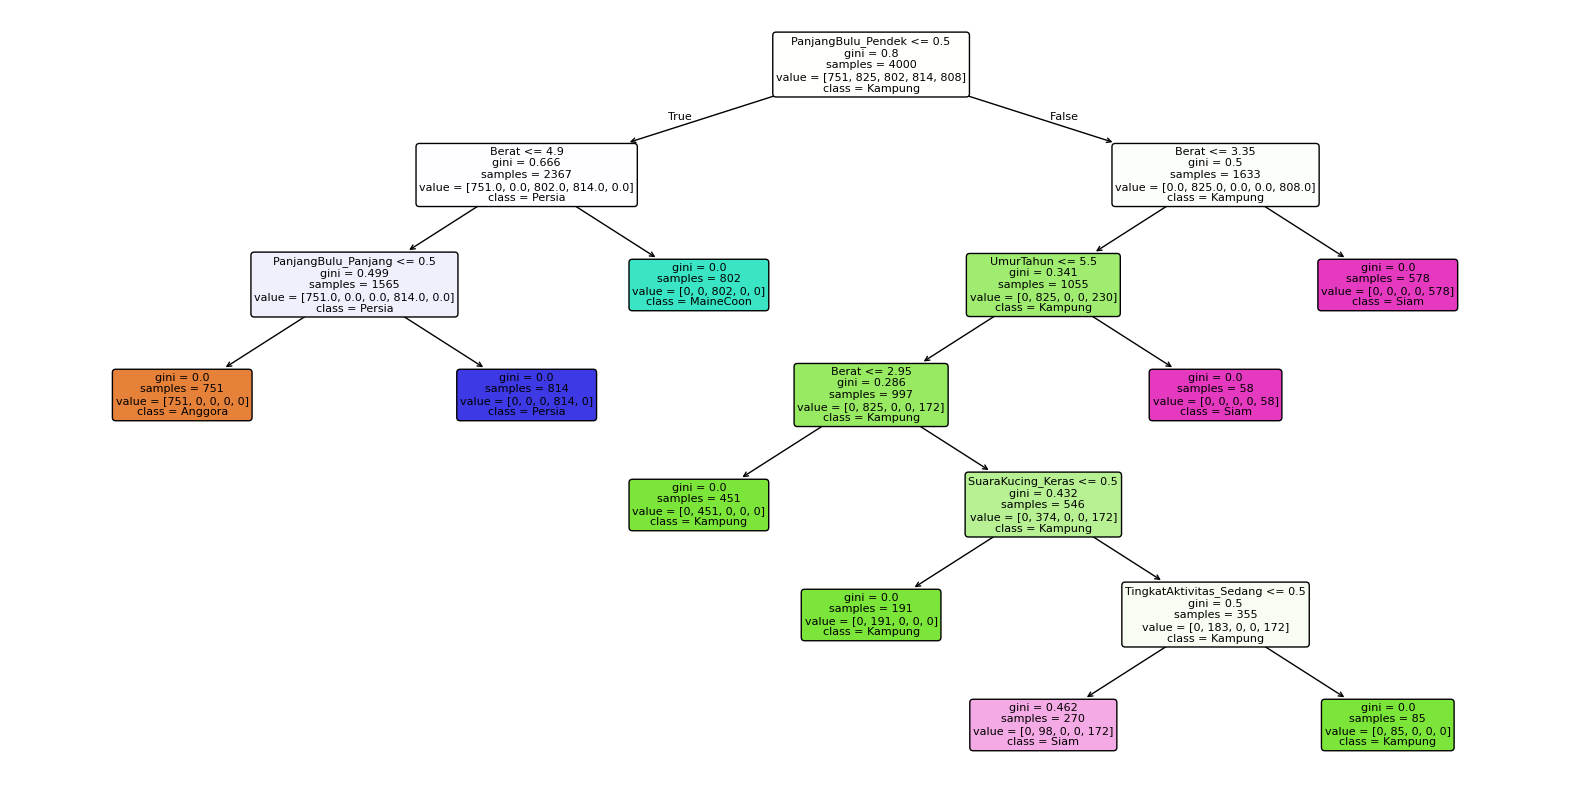

In [161]:
plt.figure(figsize=(20,10))
plot_tree(
    dt,
    feature_names=X.columns,
    class_names=le.classes_,
    filled=True,
    rounded=True,
    fontsize=8
)
plt.show()

## 7. Analisis Hasil

Model Decision Tree mampu mengklasifikasikan ras kucing dengan baik berdasarkan fitur-fitur yang tersedia. Visualisasi pohon keputusan menunjukkan aturan-aturan yang digunakan model dalam menentukan kelas.

Beberapa kesalahan klasifikasi terjadi pada ras yang memiliki karakteristik mirip, namun secara umum performa model sudah cukup baik.

## 8. Kesimpulan

Berdasarkan hasil eksperimen dan evaluasi model machine learning menggunakan algoritma Decision Tree untuk klasifikasi ras kucing, dapat ditarik beberapa kesimpulan sebagai berikut:

- Performa Model: Model yang dikembangkan menunjukkan performa yang sangat memuaskan dengan tingkat akurasi global mencapai 97,6%. Hal ini mengindikasikan bahwa algoritma Decision Tree efektif dalam mempelajari pola fitur dari dataset yang diberikan.

- Efektivitas Klasifikasi: Berdasarkan analisis Confusion Matrix, model mampu melakukan klasifikasi sempurna (presisi dan recall 100%) pada ras Anggora, MaineCoon, dan Persia. Tidak ditemukan kesalahan prediksi pada ketiga kelas tersebut.

- Analisis Kesalahan (Error Analysis): Sedikit penurunan performa teridentifikasi pada klasifikasi ras Kampung, di mana terdapat misklasifikasi sebanyak 24 sampel yang diprediksi sebagai ras Siam. Hal ini menunjukkan adanya kemiripan karakteristik fitur yang signifikan antara sebagian data kucing Kampung dengan kucing Siam, sehingga mempengaruhi keputusan model pada leaf node tertentu.

- Validitas: Secara keseluruhan, model ini dinyatakan valid dan andal untuk digunakan dalam tugas pengenalan ras kucing, dengan catatan minor pada pemisahan antara ras Kampung dan Siam.

In [162]:
import joblib

joblib.dump(dt, "decision_tree_kucing.pkl")

['decision_tree_kucing.pkl']